# Fall 2022 Data Science Intern Challenge
By Rachel Chen

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

## Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Exploratory Data Analysis (EDA)

**Loading data**

In [4]:
# Read data in a dataframe 
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns for data')

We have 5000 rows and 7 columns for data


**Check for missing data / duplicated rows**

In [7]:
# Checking for null values 
df.isna().mean()

order_id          0.0
shop_id           0.0
user_id           0.0
order_amount      0.0
total_items       0.0
payment_method    0.0
created_at        0.0
dtype: float64

No features contain missing values

In [8]:
# Checking for duplicate columns 
df.T.duplicated()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

**Data information**

In [4]:
# Look into columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [9]:
# Convert created_at into date format
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can spot some outliers for order amount and total items. Let's visualize the outliers on our data.

/Users/rachelchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rachelchen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


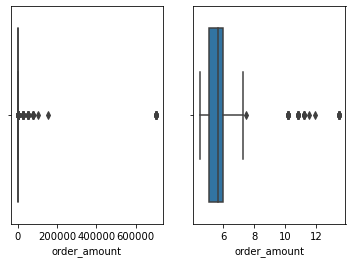

In [23]:
plt.subplot(1, 2, 1) # index 2
sns.boxplot(df['order_amount'])
plt.subplot(1, 2, 2)
sns.boxplot(np.log(df['order_amount']))
plt.show()

In [41]:
# Finding IQR
percentile25 = df['order_amount'].quantile(0.25)
percentile75 = df['order_amount'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper limit
upper_limit = percentile75 + 1.5 * iqr
# Fining Outliers
df[df['order_amount'] > upper_limit].sort_values(by=['order_amount'], ascending=False).head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [38]:
upper_limit

730.5

Order_amount above \\$730.5 consider outliers in this data set. The user 607 made multiple purchases of the order amount \\$704,000 at shop 42 at 4 pm in different date. This is a red flag and we should investigate further if this is a fraud transaction or technical issues.

In [40]:
df['order_amount'].sum()/df['total_items'].sum()

357.92152221412965

The average payment amount per item is \\$357.92

In [37]:
print(df['order_amount'].mean())
print(df['order_amount'].median())

3145.128
284.0


#### a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

The AOV of \\$3,145.13 is the mean of the order amount, and mean is not a robust statistic. From above EDA we spotted some outliers which have a huge impact on the mean. Therefore, we should use the median \\$284 as the AOV here because it is a robust statistics that has a breakdown point of 50%, and it wouldn't affected by outliers.

#### b.	What metric would you report for this dataset?

I would report the median of the dataset as AOV.

#### c.	What is its value?

In [42]:
print(df['order_amount'].median())

284.0


The value is $284.

## Question 2: For this question you’ll need to use SQL. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### a.	How many orders were shipped by Speedy Express in total?

**54** orders were shipped by Speedy Express in total.

**SQL Queries:**

`
SELECT COUNT(*) AS TotalOrdersbySE
FROM ORDERS a 
JOIN Shippers b 
ON a.ShipperID = b.ShipperID
WHERE ShipperName = "Speedy Express"
`

#### b.	What is the last name of the employee with the most orders?

**Peacock** is the last name of  the employee with the most orders (40 orders).

**SQL Queries:**

`
SELECT LastName, COUNT(*) AS NumberofOrders 
FROM Orders o
JOIN Employees e 
ON o.EmployeeID = e.EmployeeID
GROUP BY o.EmployeeID
ORDER BY NumberofOrders DESC
LIMIT 1;
`

#### c.	What product was ordered the most by customers in Germany?

**Boston Crab Meat** was ordered the most by customers in Germany by total quantity (160).

**SQL Queries:**

`
SELECT ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID 
JOIN OrderDetails d ON o.OrderID = d.OrderID 
JOIN Products p ON d.ProductID = p.ProductID
WHERE Country='Germany'
GROUP BY ProductName
ORDER BY TotalQuantity DESC
LIMIT 1;
`